# PREP:
- Goal: leave this section with a dataset that is ready to be analyzed. **Data types** are appropriate, **missing values** have been addressed, as have any data integrity issues.

- The ad hoc part includes **plotting the distributions of individual variables** and using those plots to identify **outliers** and if those should be handled (and if so, how), identify **unit scales** to identify how to best scale the numeric data, as well as finding **erroneous or invalid data** that may exist in your dataframe.

- Add a **data dictionary** in your notebook that defines all fields used in either your model or your analysis, and answers the question: **why did you use the fields you used**, e.g. why did you use bedroom_field1 over bedroom_field2, not why did you use number of bedrooms!

- `prep.py`: The reproducible part is the handling of missing values, fixing data integrity issues, changing data types, etc.

In [1]:
from acquire import acquire_data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Data Cleaning

In [2]:
df = acquire_data()
df.head()

,home_size,bedroomcnt,bathroomcnt,tax_rate,yearbuilt,regionidcounty,home_value
0,1604.0,4.0,2.0,0.012220,1950.0,3101.0,498347.0
1,2384.0,3.0,3.0,0.012146,1937.0,3101.0,549917.0
2,1574.0,3.0,2.0,0.016476,1990.0,3101.0,235272.0
3,1619.0,2.0,2.0,0.012371,1983.0,3101.0,340000.0
4,2408.0,2.0,3.0,0.012073,1952.0,3101.0,2017254.0


In [3]:
df = df.rename(columns={'regionidzip': 'zip'})
df.head()

,home_size,bedroomcnt,bathroomcnt,tax_rate,yearbuilt,regionidcounty,home_value
0,1604.0,4.0,2.0,0.012220,1950.0,3101.0,498347.0
1,2384.0,3.0,3.0,0.012146,1937.0,3101.0,549917.0
2,1574.0,3.0,2.0,0.016476,1990.0,3101.0,235272.0
3,1619.0,2.0,2.0,0.012371,1983.0,3101.0,340000.0
4,2408.0,2.0,3.0,0.012073,1952.0,3101.0,2017254.0


In [4]:
df.shape

(16075, 7)

In [5]:
df.dtypes

home_size         float64
bedroomcnt        float64
bathroomcnt       float64
tax_rate          float64
yearbuilt         float64
regionidcounty    float64
home_value        float64
dtype: object

In [6]:
df.isnull().sum()

home_size         40
bedroomcnt         0
bathroomcnt        0
tax_rate          38
yearbuilt         46
regionidcounty     0
home_value         3
dtype: int64

In [7]:
df[df.home_size.isnull()].head(5)

,home_size,bedroomcnt,bathroomcnt,tax_rate,yearbuilt,regionidcounty,home_value
5,NaN,0.0,0.0,0.014476,NaN,3101.0,5240710.0
1299,NaN,0.0,0.0,NaN,1990.0,3101.0,19.0
2081,NaN,0.0,0.0,0.011958,NaN,3101.0,9710604.0
2159,NaN,0.0,0.0,0.011948,NaN,3101.0,2274642.0
3809,NaN,0.0,0.0,NaN,NaN,3101.0,9345.0


In [8]:
df[df.home_value.isnull()].head()

,home_size,bedroomcnt,bathroomcnt,tax_rate,yearbuilt,regionidcounty,home_value
3985,807.0,3.0,1.0,NaN,1924.0,3101.0,NaN
9643,NaN,0.0,0.0,NaN,NaN,3101.0,NaN
10047,1650.0,2.0,2.0,NaN,1987.0,2061.0,NaN


In [9]:
df[df.tax_rate.isnull()].head()

,home_size,bedroomcnt,bathroomcnt,tax_rate,yearbuilt,regionidcounty,home_value
455,796.0,1.0,1.0,NaN,1920.0,3101.0,77615.0
1299,NaN,0.0,0.0,NaN,1990.0,3101.0,19.0
1355,1186.0,3.0,2.0,NaN,1955.0,3101.0,19482.0
1546,881.0,0.0,0.0,NaN,1928.0,3101.0,121159.0
1688,868.0,2.0,1.0,NaN,1949.0,3101.0,36964.0


In [10]:
# since Null doesn't make any sense here I will drop those rows 
df.dropna(inplace = True)

In [11]:
#check shape
df.shape

(15996, 7)

In [12]:
#validate if there is still null
df.isnull().sum()

home_size         0
bedroomcnt        0
bathroomcnt       0
tax_rate          0
yearbuilt         0
regionidcounty    0
home_value        0
dtype: int64

In [13]:
# since it does not make any sense if a unit without a bathroom, check if there is any
(df.bathroomcnt == 0).sum()

43

In [14]:
# check the data shape
df[df.bathroomcnt == 0].head()

,home_size,bedroomcnt,bathroomcnt,tax_rate,yearbuilt,regionidcounty,home_value
1457,260.0,1.0,0.0,0.026812,1958.0,3101.0,9265.0
1458,400.0,0.0,0.0,0.022333,1959.0,3101.0,7817.0
2219,1402.0,0.0,0.0,0.012828,1921.0,3101.0,172328.0
2349,2126.0,0.0,0.0,0.013696,1946.0,3101.0,134118.0
2433,380.0,0.0,0.0,0.012118,1939.0,3101.0,192440.0


In [15]:
#drop those rows 
df = df[df.bathroomcnt != 0]
df.shape

(15953, 7)

In [16]:
#check data integrity 
df.describe()

,home_size,bedroomcnt,bathroomcnt,tax_rate,yearbuilt,regionidcounty,home_value
count,15953.000000,15953.000000,15953.000000,15953.000000,15953.000000,15953.000000,1.595300e+04
mean,1836.923024,3.252930,2.215633,0.013343,1958.123676,2733.669717,4.634141e+05
std,985.023029,0.950585,1.026807,0.003730,22.113714,701.600991,6.434798e+05
min,320.000000,0.000000,1.000000,0.000032,1862.000000,1286.000000,1.216800e+04
25%,1233.000000,3.000000,2.000000,0.011919,1947.000000,3101.000000,1.819820e+05
50%,1592.000000,3.000000,2.000000,0.012461,1955.000000,3101.000000,3.205610e+05
75%,2162.000000,4.000000,3.000000,0.013691,1971.000000,3101.000000,5.285260e+05
max,26345.000000,25.000000,20.000000,0.155072,2015.000000,3101.000000,1.912982e+07


## Ploting - Identify outliers

### home_size

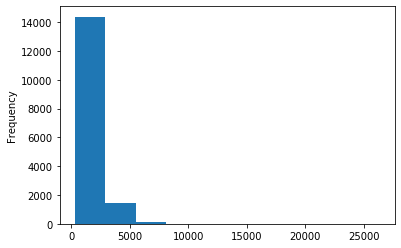

In [17]:
df.home_size.plot.hist()

In [18]:
# by looking at the plot, majority of the points located below  5000, check the percenticle to
#keep the data below 99 percentile
home_size_percentile = df.home_size.quantile(.95)
home_size_percentile

3541.3999999999996

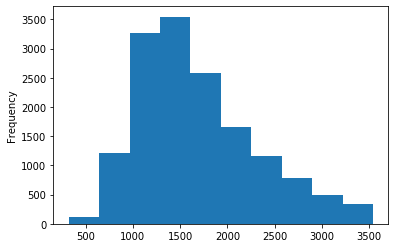

In [19]:
df = df[df.home_size <= home_size_percentile]
df.home_size.plot.hist()

### bedroomcnt

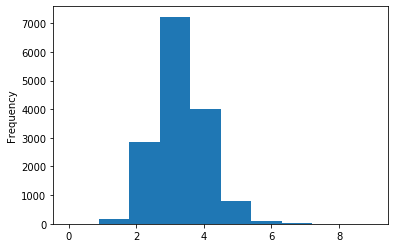

In [20]:
df.bedroomcnt.plot.hist()

In [21]:
#percentile 
bedroom_percentitle = df.bedroomcnt.quantile(.95)
bedroom_percentitle

5.0

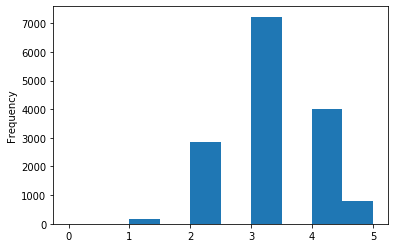

In [22]:
# drop the outliers
df = df[df.bedroomcnt <= bedroom_percentitle]
df.bedroomcnt.plot.hist()

### bathroomcnt

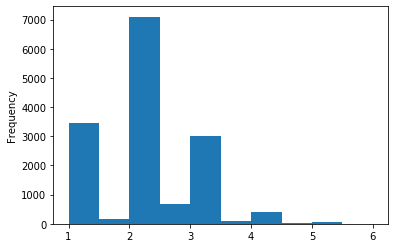

In [23]:
df.bathroomcnt.plot.hist()

In [24]:
#check outliers
bathroom_percentile = df.bathroomcnt.quantile(.95)
bathroom_percentile

3.0

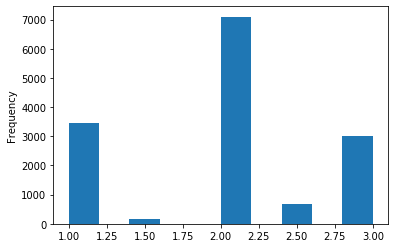

In [25]:
#drop the outliers
df = df[df.bathroomcnt <= bathroom_percentile]
df.bathroomcnt.plot.hist()

In [26]:
df.bathroomcnt.value_counts()

2.0    7100
1.0    3455
3.0    3021
2.5     682
1.5     173
Name: bathroomcnt, dtype: int64

### home_value

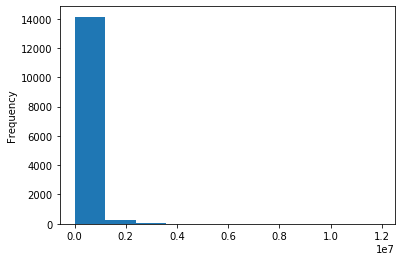

In [27]:
df.home_value.plot.hist()

In [28]:
#check outliers
homevalue_percentile = df.home_value.quantile(.95)
homevalue_percentile

877182.0

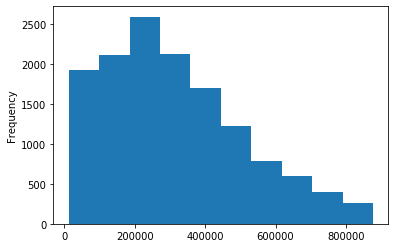

In [29]:
#drop outliers
df = df[df.home_value <= homevalue_percentile]
df.home_value.plot.hist()

### tax_rate

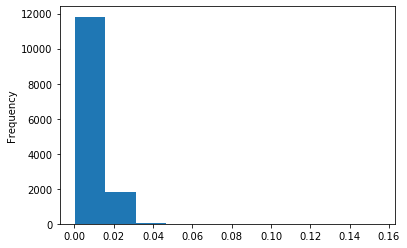

In [30]:
df.tax_rate.plot.hist()

In [31]:
# check high outliers 
tax_rate_percentile = df.tax_rate.quantile(.95)
tax_rate_percentile

0.018993092313873673

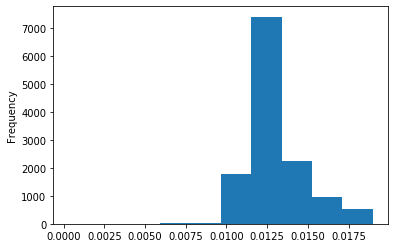

In [32]:
df = df[df.tax_rate <= tax_rate_percentile]
df.tax_rate.plot.hist()

In [33]:
#check low percentile
tax_rate_percentile = df.tax_rate.quantile(.05)
tax_rate_percentile

0.010686372244698468

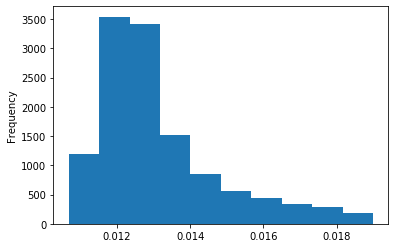

In [34]:
df = df[df.tax_rate >= tax_rate_percentile]
df.tax_rate.plot.hist()

### yearbuilt

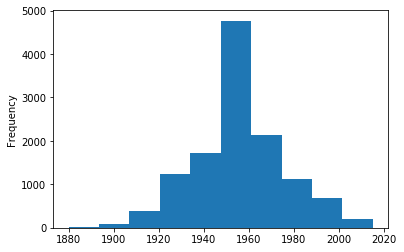

In [35]:
df.yearbuilt.plot.hist()

It looks like well distributed, no need to drop outliers

## Create new feature bedrm_per_bathrm

In [36]:
df['bedrm_per_bathrm'] = df.bedroomcnt / df.bathroomcnt
df.head()

,home_size,bedroomcnt,bathroomcnt,tax_rate,yearbuilt,regionidcounty,home_value,bedrm_per_bathrm
0,1604.0,4.0,2.0,0.012220,1950.0,3101.0,498347.0,2.0
1,2384.0,3.0,3.0,0.012146,1937.0,3101.0,549917.0,1.0
2,1574.0,3.0,2.0,0.016476,1990.0,3101.0,235272.0,1.5
3,1619.0,2.0,2.0,0.012371,1983.0,3101.0,340000.0,1.0
6,1721.0,4.0,2.0,0.010892,1952.0,3101.0,629951.0,2.0


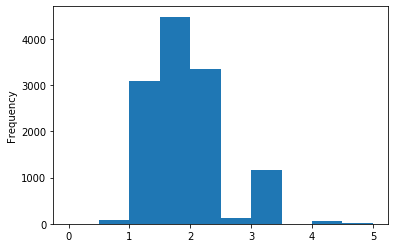

In [37]:
df.bedrm_per_bathrm.plot.hist()

In [38]:
df.bedrm_per_bathrm.value_counts()

1.500000    3943
2.000000    3340
1.000000    1606
1.333333    1284
3.000000    1167
1.666667     332
1.600000     202
1.200000     201
2.500000     117
4.000000      71
0.666667      41
0.800000      19
2.666667      17
0.500000      16
5.000000       9
0.000000       3
0.333333       2
3.333333       1
Name: bedrm_per_bathrm, dtype: int64